In [89]:
import pandas as pd
dataset = pd.read_csv('/Users/adi/Desktop/TA_Adi_V2/QE Statistik V2/logistic_regression/dataset/dataset_keparahan.csv')
dataset.fillna(dataset.mean(), inplace = True)

/var/folders/tl/qtfjbsjd2f3f54prw95dl_5m0000gn/T/ipykernel_34071/3516666080.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [91]:
dataset.drop('No Document', axis=1, inplace=True)
dataset.drop('title', axis=1, inplace=True)
dataset.drop('Description', axis=1, inplace=True)
dataset=dataset.dropna(axis=0)

In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Mati            1127 non-null   int64
 1   Luka            1127 non-null   int64
 2   KerugianBarang  1127 non-null   int64
 3   KerugianUang    1127 non-null   int64
 4   Pemerkosaan     1127 non-null   int64
 5   Keparahan       1127 non-null   int64
dtypes: int64(6)
memory usage: 61.6 KB


In [94]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Mati'] = LE.fit_transform(dataset['Mati'])
LE = LabelEncoder()
dataset['Luka'] = LE.fit_transform(dataset['Luka'])
LE = LabelEncoder()
dataset['KerugianBarang'] = LE.fit_transform(dataset['KerugianBarang'])
LE = LabelEncoder()
dataset['KerugianUang'] = LE.fit_transform(dataset['KerugianUang'])
LE = LabelEncoder()
dataset['Pemerkosaan'] = LE.fit_transform(dataset['Pemerkosaan'])
X = dataset.drop(['Keparahan'], axis = 1)
y = dataset['Keparahan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [96]:
logreg = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [97]:
print("Train acccuracy: ",logreg.score(X_train,y_train))
print("Test acccuracy: ",logreg.score(X_test,y_test))

Train acccuracy:  0.925638179800222
Test acccuracy:  0.9292035398230089


In [101]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 73   0   0]
 [ 11  17   4]
 [  0   1 120]]


In [102]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        73
           2       0.94      0.53      0.68        32
           3       0.97      0.99      0.98       121

    accuracy                           0.93       226
   macro avg       0.93      0.84      0.86       226
weighted avg       0.93      0.93      0.92       226



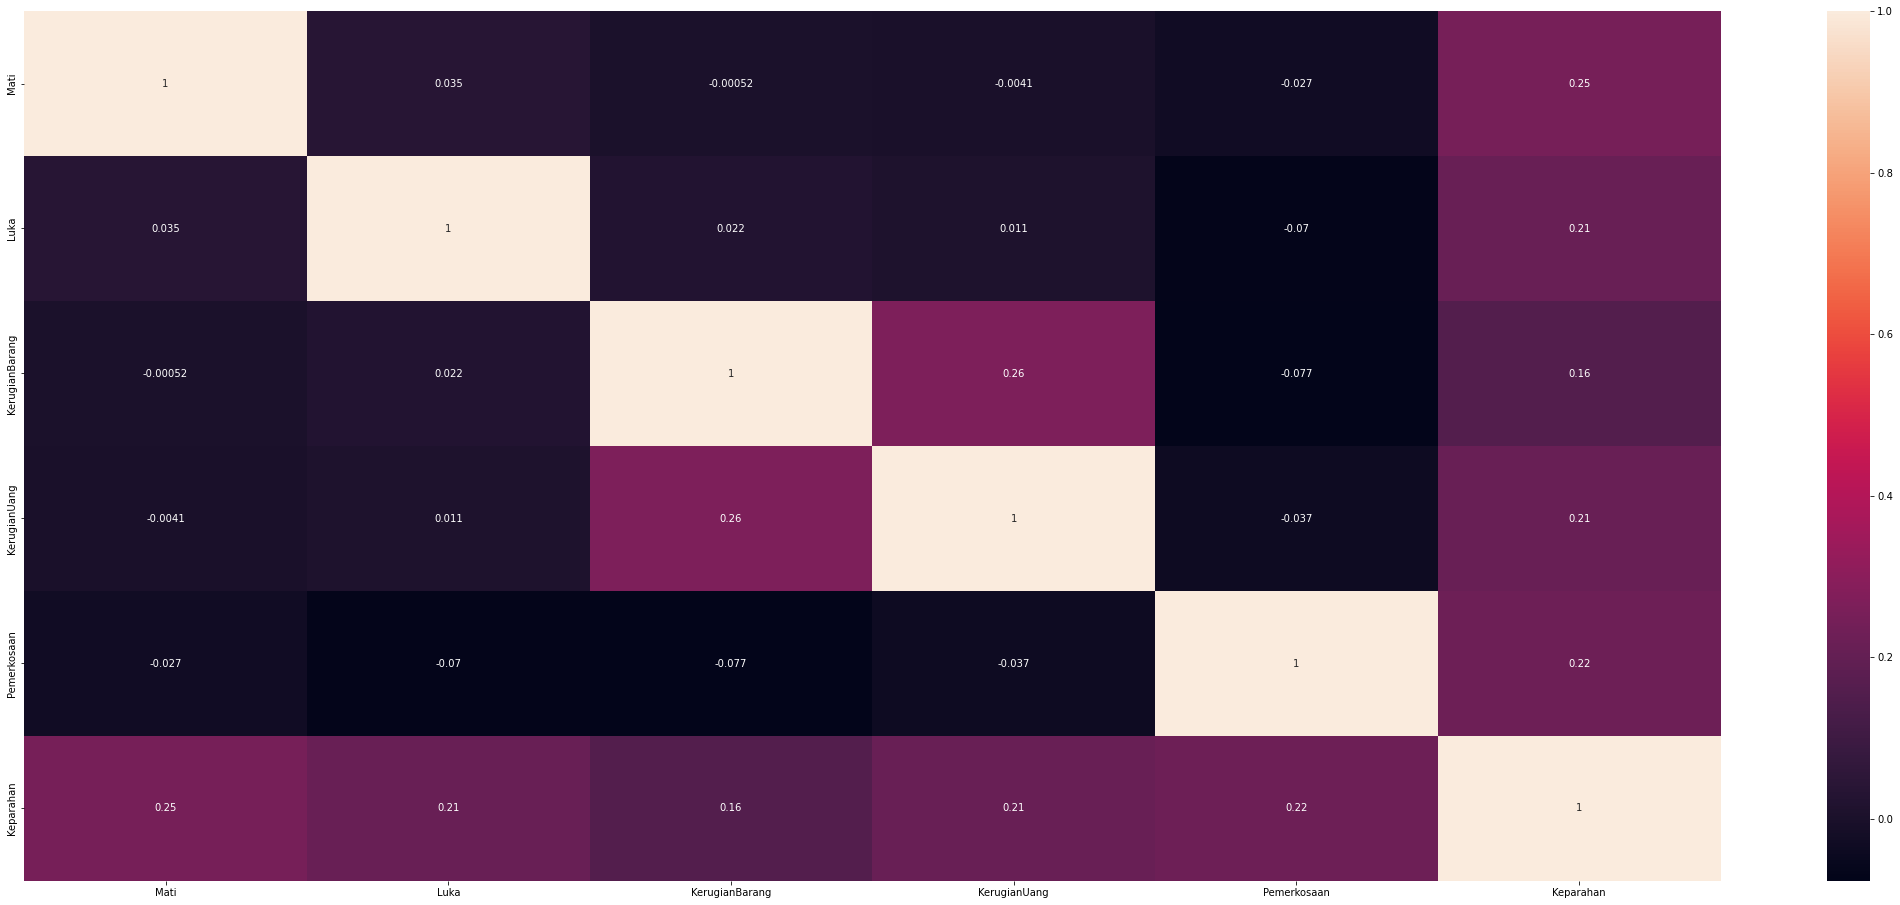

In [118]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (38,16))
sns.heatmap(dataset.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

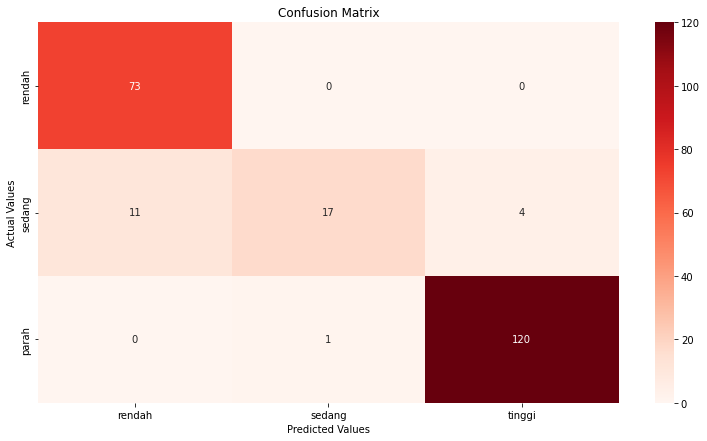

In [121]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['rendah','sedang','parah'], 
                     columns = ['rendah','sedang','tinggi'])
plt.figure(figsize=(13,7))
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True,fmt='d', cmap='Reds')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')